## Importing the packages

In [1]:
# importing libraries
# basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from datetime import date

In [2]:
# for Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, roc_curve, auc
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

## Reading CSV file

In [3]:
final_df = pd.read_csv('Cleaned_Data.csv')

### Displaying the data

In [4]:
final_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,33,12,1,0,0,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,0,0,0,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,0,0,0,1.0,-11,0
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,25,3,0,0,0,1.0,-12,0


## Describes the columns

In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_WORK_PHONE      777715 non-null  int64  
 13  FLAG_PHONE           777715 non-null  int64  
 14  FLAG_EMAIL           777715 non-null  int64  
 15  CNT_FAM_MEMBERS  

## Printing the number of rows and columns

In [6]:
print(final_df.shape)

(777715, 18)


### Feature Selection

In [7]:
final_df['CODE_GENDER'].value_counts()

F    518851
M    258864
Name: CODE_GENDER, dtype: int64

In [8]:
def Convert_into_days(number):
    today = datetime.date.today()
    number=(today + datetime.timedelta(days=number)).strftime('%Y-%m-%d')
    number=datetime.datetime.strptime(number,'%Y-%m-%d')
    result=today.year-number.year
    return result       

In [9]:
final_df['DAYS_BIRTH']=final_df['DAYS_BIRTH'].apply(Convert_into_days)
final_df['DAYS_EMPLOYED']=final_df['DAYS_EMPLOYED'].apply(Convert_into_days)

### Feature Scaling

In [10]:
# let's make all data in one scale,for that we have to first change the categorical data to numrical data .
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-1,0,1,0,0,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-1,0,1,0,0,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-1,0,1,0,0,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-1,0,1,0,0,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-1,0,1,0,0,2.0,-4,0


In [11]:
inc_type = {'Working':1,'Commercial associate':2,'Pensioner':3,'State servant':4,'Student':5}
Gender = {'F':0,'M':1}
car = {'N':0,'Y':1}
reality = {'N':0,'Y':1}
edu_type = {'Secondary / secondary special':1,'Higher education':2,'Incomplete higher':3,'Lower secondary':4,'Academic degree':5}
fam_type = {'Married':1,'Single / not married':2,'Civil marriage':3,'Separated':4,'Widow':5}
house_type = {'House / apartment':1,'With parents':2,'Municipal apartment':3,'Rented apartment':4,'Office apartment':5,'Co-op apartment':6}

In [12]:
#lets replace it into numerical value
final_df.replace({'NAME_INCOME_TYPE':inc_type},inplace=True)
final_df.replace({'FLAG_OWN_CAR':car},inplace=True)
final_df.replace({'FLAG_OWN_REALTY':reality},inplace=True)
final_df.replace({'CODE_GENDER':Gender},inplace=True)
final_df.replace({'NAME_EDUCATION_TYPE':edu_type},inplace=True)
final_df.replace({'NAME_FAMILY_STATUS':fam_type},inplace=True)
final_df.replace({'NAME_HOUSING_TYPE':house_type},inplace=True)

In [13]:
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,0,0
1,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-1,0
2,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-2,0
3,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-3,0
4,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-4,0


#### We can see that our all data in float or in int data types.Now we ready to apply FeatureScaling on our data.

In [14]:
final_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,0,0
1,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-1,0
2,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-2,0
3,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-3,0
4,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-4,0


In [15]:
final_df.STATUS.value_counts()

0    774887
1      2828
Name: STATUS, dtype: int64

In [16]:
final_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,0,0
1,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-1,0
2,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-2,0
3,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-3,0
4,5008804,1,1,1,0,427500.0,1,2,3,4,-1,0,1,0,0,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,1,1,2,4,-1,0,0,0,0,1.0,-9,0
777711,5150337,1,0,1,0,112500.0,1,1,2,4,-1,0,0,0,0,1.0,-10,1
777712,5150337,1,0,1,0,112500.0,1,1,2,4,-1,0,0,0,0,1.0,-11,0
777713,5150337,1,0,1,0,112500.0,1,1,2,4,-1,0,0,0,0,1.0,-12,0


In [17]:
X = final_df.drop(['STATUS'], axis=1)
y =  final_df['STATUS']
x_train1, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 10)

In [18]:
!pip install imbalanced-learn

In [19]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=1) #resample of imbalanced label
X_res, y_res = undersample.fit_resample(x_train1, y_train)

In [20]:
X_train2, X_val, y_train, y_val = train_test_split(X_res, y_res,test_size=0.2,random_state=10)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train2)
X_train =  scaler.transform(X_train2)
X_val_norm = scaler.transform(X_val)
x_test = scaler.transform(X_test)

### Logistic Regression

In [22]:
# declaring a object of Logistic regression class
clf1 = LogisticRegression()
# fit() function trains the model
# fitting the object with the training data
clf1.fit(X_train, y_train)
# predict() function predicts results from validation data
# predicting result using the trained data
y_pred1 = clf1.predict(x_test)
# confusion_matrix() gives the true_positives, false positives, true negatives, false negatives
# making confusion matrix using predicted and given results in validation data
cm1=confusion_matrix(y_test,y_pred1)
# printing the confusion matrix
print(cm1)
# accuracy_score() is used to find the accuracy of the model
lr_acc_score = accuracy_score(y_test, y_pred1)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,y_pred1))

[[87512 67441]
 [  252   338]]
Accuracy of Logistic Regression: 56.47955870723851 

              precision    recall  f1-score   support

           0       1.00      0.56      0.72    154953
           1       0.00      0.57      0.01       590

    accuracy                           0.56    155543
   macro avg       0.50      0.57      0.37    155543
weighted avg       0.99      0.56      0.72    155543



### K Neighbors Classifier

In [23]:
# declaring a object of K Neighbors Classifier class
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(x_test)
cm2 = confusion_matrix(y_test,y_pred2)
print(cm2)
knn_acc_score = accuracy_score(y_test, y_pred2)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,y_pred2))


[[112583  42370]
 [    70    520]]
Accuracy of K-NeighborsClassifier: 72.71494056305974 

              precision    recall  f1-score   support

           0       1.00      0.73      0.84    154953
           1       0.01      0.88      0.02       590

    accuracy                           0.73    155543
   macro avg       0.51      0.80      0.43    155543
weighted avg       1.00      0.73      0.84    155543



### Naive Bayes

In [24]:
# declaring a object of GaussianNB classifier
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(x_test)
cm3 = confusion_matrix(y_test,y_pred3)
print(cm3)
nb_acc_score = accuracy_score(y_test,y_pred3)
print(nb_acc_score)
print("Accuracy of Naive Bayes:",nb_acc_score*100,'\n')
print(classification_report(y_test,y_pred3))

[[97211 57742]
 [  274   316]]
0.6270098943700456
Accuracy of Naive Bayes: 62.70098943700456 

              precision    recall  f1-score   support

           0       1.00      0.63      0.77    154953
           1       0.01      0.54      0.01       590

    accuracy                           0.63    155543
   macro avg       0.50      0.58      0.39    155543
weighted avg       0.99      0.63      0.77    155543



### Decision Tree

In [25]:
#declaring a object of Decision Tree Classifier class
clf4 = DecisionTreeClassifier(criterion='entropy')
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(x_test)
cm4 = confusion_matrix(y_test,y_pred4)
print(cm4)
dt_acc=accuracy_score(y_test,y_pred4)
print(dt_acc)
print("Accuracy of Decision Tree:",dt_acc*100,'\n')
print(classification_report(y_test,y_pred4))

[[126530  28423]
 [    44    546]]
0.8169830850632944
Accuracy of Decision Tree: 81.69830850632944 

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    154953
           1       0.02      0.93      0.04       590

    accuracy                           0.82    155543
   macro avg       0.51      0.87      0.47    155543
weighted avg       1.00      0.82      0.90    155543



### Random Forest

In [26]:
# declaring a object of Random Forest Classifier class
clf5 = RandomForestClassifier(criterion='entropy',n_estimators=50)
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(x_test)
cm5 = confusion_matrix(y_test,y_pred5)
print(cm5)
rf_acc_score = accuracy_score(y_test, y_pred5)
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,y_pred5))

[[144669  10284]
 [    43    547]]
Accuracy of Random Forest: 93.36067839761351 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97    154953
           1       0.05      0.93      0.10       590

    accuracy                           0.93    155543
   macro avg       0.53      0.93      0.53    155543
weighted avg       1.00      0.93      0.96    155543



### Support Vector Classifier

In [27]:
# declaring a object of Support Vector Classifier class
clf6 =  SVC(kernel='rbf', C=2)
clf6.fit(X_train, y_train)
y_pred6 = clf6.predict(x_test)
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
svc_acc_score = accuracy_score(y_test, y_pred6)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,y_pred6))

[[111383  43570]
 [   147    443]]
Accuracy of Support Vector Classifier: 71.89394572561928 

              precision    recall  f1-score   support

           0       1.00      0.72      0.84    154953
           1       0.01      0.75      0.02       590

    accuracy                           0.72    155543
   macro avg       0.50      0.73      0.43    155543
weighted avg       0.99      0.72      0.83    155543



In [28]:
# making the set of parameters to test the RandomizedSearchCV 
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini']
}
print(param_grid)

{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [29]:
# RandomizedSearchCV randomly assigns a best class and checks if it is best by training the model on those parameters
# making an object of the RandomizedSearchCV class
rcv = RandomizedSearchCV(estimator=clf5,param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
# training the RandomizedSearchCV to find the best parameters
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=50),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 7, 10, 12,
                                                              14],
                                        'n_estimators': [2, 12, 23, 34, 45, 56,
                                                         67, 78, 89, 100]},
                   verbose=2)

In [30]:
# prints the best attributes that were found by RandomizedSearchCV
rcv.best_params_

{'n_estimators': 78,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'entropy'}

In [31]:
# this best_estimator_ prints the best model that was found by RandomizedSearchCV
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_split=5, n_estimators=78)

### Random Forest after Hyper Tuning

In [32]:
# making another object of the Random Forest Classifier to test it with the best parameters
clf8 = RandomForestClassifier(criterion='entropy',n_estimators=100,max_depth=890,max_features='auto',min_samples_split=2,min_samples_leaf=1)
clf8.fit(X_train, y_train)
y_pred8 = clf8.predict(x_test)
cm8 = confusion_matrix(y_test,y_pred8)
print(cm8)
rf1_acc_score=accuracy_score(y_test,y_pred8)
print("Accuracy of Random Forest after Hyperparameter tuning:",rf1_acc_score*100,'\n')
print(classification_report(y_test,y_pred8))

[[145144   9809]
 [    35    555]]
Accuracy of Random Forest after Hyperparameter tuning: 93.67120346142225 

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    154953
           1       0.05      0.94      0.10       590

    accuracy                           0.94    155543
   macro avg       0.53      0.94      0.53    155543
weighted avg       1.00      0.94      0.96    155543



### Xgboost

In [33]:
# making an object of the XGBoost class 
clf7 = XGBClassifier()
clf7.fit(X_train, y_train)
y_pred7 = clf7.predict(x_test)
cm7 = confusion_matrix(y_test,y_pred7)
print(cm7)
xgb_acc_score=accuracy_score(y_test,y_pred7)
print("Accuracy of XGBoost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,y_pred7))

[[135064  19889]
 [    47    543]]
Accuracy of XGBoost: 87.18296548221393 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    154953
           1       0.03      0.92      0.05       590

    accuracy                           0.87    155543
   macro avg       0.51      0.90      0.49    155543
weighted avg       1.00      0.87      0.93    155543



In [34]:
final_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'STATUS'],
      dtype='object')

### Feature Importance

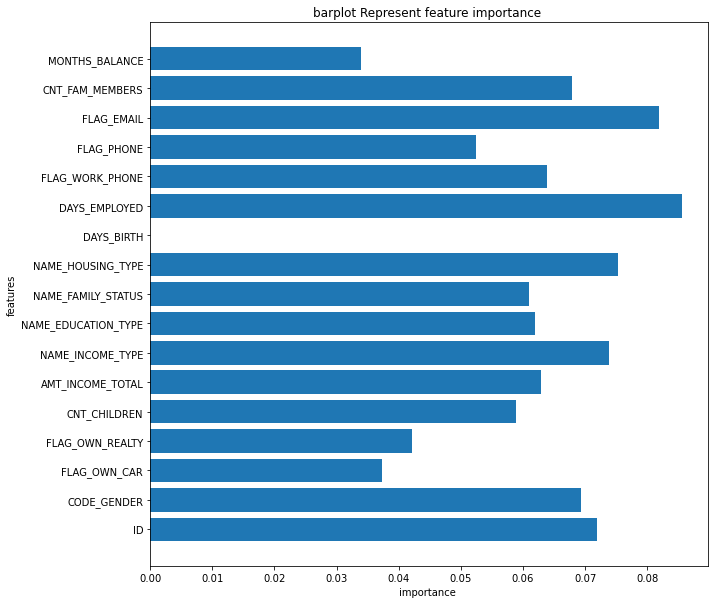

In [48]:
imp_feature = pd.DataFrame({'Feature': ['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH','DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS', 'MONTHS_BALANCE'], 'Importance': clf7.feature_importances_})
plt.figure(figsize=(10,10))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

In [39]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
clfs = [('logistic Regression', clf1),
        ('K Neighbors', clf2),
        ('Naive Bayes', clf3),
        ('Decision Tree', clf4),
        ('SVC', clf6),
        ('Random Forest', clf8),
        ('XGBoost',clf7)]

clf_vot = VotingClassifier(clfs)

y_pred = cross_val_predict(clf_vot, X_train, y_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1778
           1       0.86      0.87      0.86      1802

    accuracy                           0.86      3580
   macro avg       0.86      0.86      0.86      3580
weighted avg       0.86      0.86      0.86      3580



In [40]:
from sklearn.metrics import f1_score
f1_scores={}
for key, clf in clfs:
  print(f"Evaluating model {key}...", end="")
  y_pred1 = cross_val_predict(clf, X_train, y_train, verbose=3)
  f1_scores[key] = f1_score(y_train, y_pred)
  print(f"Done. F1 score={f1_scores[key]}.")

Evaluating model logistic Regression...Done. F1 score=0.8633608815426997.
Evaluating model K Neighbors...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concur

Done. F1 score=0.8633608815426997.
Evaluating model Naive Bayes...Done. F1 score=0.8633608815426997.
Evaluating model Decision Tree...Done. F1 score=0.8633608815426997.
Evaluating model SVC...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Done. F1 score=0.8633608815426997.
Evaluating model Random Forest...

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Done. F1 score=0.8633608815426997.
Evaluating model XGBoost...

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Done. F1 score=0.8633608815426997.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [41]:
f1_scores['voting'] = f1_score(y_train, y_pred)
f1_scores['voting']

0.8633608815426997

In [42]:
bestmodelkey = max(f1_scores, key=lambda k: f1_scores[k])
bestmodelkey

'logistic Regression'

### ROC Curve for Random Forest

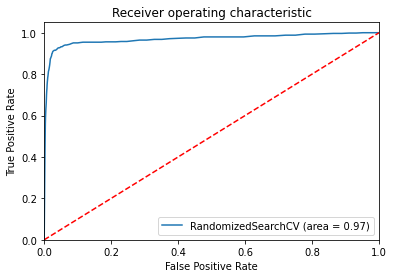

In [43]:
probs = clf8.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='RandomizedSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()